In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dt = pd.read_csv('./Labelled number Data/mnist_test.csv')
dx = pd.read_csv('./Labelled number Data/mnist_train.csv')

#converting to numpy array
#t = dt.values
#x = dx.values
#dt.shape
#removing the unuseful data
#

In [3]:
dx.shape
dx.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#convert it into numpy array
data= dx.values
t =dt.values

In [5]:
x=data[:,1:]
y=data[:,0]
x_test=t[:,1:]
y_test=t[:,0]

In [6]:
print(x_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [7]:
print(x.shape)

(59999, 784)


In [8]:
#visualise the data

def drawImage(data):
    #reshape the image
    img = data.reshape(28,28)
    plt.imshow(img,cmap='gray')
    plt.show()
    

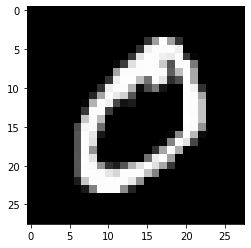

0


In [9]:
drawImage(x[0])
print(y[0])

In [10]:
#k nearest neighbour
#Step 1: find the k nearest neighbours 

def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

#knn algorithm

def knn(x,y,querypoint,k=5):
    
    # pick k nearest neighbours
    
    vals= []
    #for every point in the x
    for i in range(x.shape[0]):
        
        #compute distance
        
        d= distance(querypoint , x[i])
        vals.append((d,y[i]))
            # sort the array and find k nearest points

    vals = sorted(vals)
    vals = vals[:k]
        #majority vote
    vals = np.array(vals)
    new_value = np.unique(vals[:,1],return_counts = True)
        # index of mass count

    index = new_value[1].argmax()
    
    #map this index with my data
    pred = new_value[0][index]
    return pred

In [11]:
#make predictions over test images

pred =knn(x,y,x_test[1])

In [12]:
pred

1.0

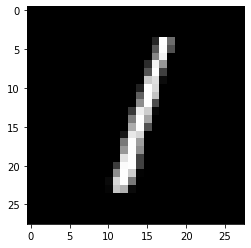

In [13]:
drawImage(x_test[1])

In [14]:
print(y_test[1])

1


In [ ]:
count = 0
for i in range(9999):
    pred =knn(x,y,x_test[i])
    pred =int(pred)
    if pred == test:
        count = count+1

In [ ]:
accuracy = count/9999
print(accuracy)